## iFLYTEK 아기 울음 인식 챌린지 데이터 세트

데이터에 대한 추가적인 설명은 없으며 파일 이름을 통해 라벨링되어 있다. 

데이터셋은 아래 홈페이지에서 다운 받을 수 있다. 데이터셋 중 라벨링되어 있는 train 부분만을 데이터로 사용한다.

https://aistudio.baidu.com/aistudio/datasetdetail/41960

In [19]:
# Load packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
from shutil import move
import matplotlib.pyplot as plt

In [20]:
# load variables
%store -r main_path data_path csv_path

main_path = main_path
data_path = data_path
csv_path = csv_path

origin_file_path = "/Users/jaewone/Downloads/dddd/train"

In [21]:
label_list = ['hug', 'diaper', 'hungry', 'sleepy', 'awake', 'uncomfortable']

In [22]:
# extract data from json
file_list = []
state_list = []


count_total = 0
for label in label_list:
    label_folder_path = os.path.join(origin_file_path, label)
    for file in os.listdir(label_folder_path):
        if file.rsplit('.')[1] == 'wav':
            file_list.append(os.path.join(label_folder_path, file))
            state_list.append(file.split('_', 1)[0])

In [23]:
# Create dataframe

df = pd.DataFrame(list(zip(file_list, state_list)), columns=['file', 'state'])

df['source'] = 'iFLYTEK'
df['gender'] = df['age'] = df['detail'] = ''
df.tail(3)

,file,state,source,gender,age,detail
915,/Users/jaewone/Downloads/dddd/train/uncomforta...,uncomfortable,iFLYTEK,,,
916,/Users/jaewone/Downloads/dddd/train/uncomforta...,uncomfortable,iFLYTEK,,,
917,/Users/jaewone/Downloads/dddd/train/uncomforta...,uncomfortable,iFLYTEK,,,


In [24]:
# move file to data folder
def move_all_file_in_folder(from_path, to_path, extension=None):
  for (path, dirs, files) in os.walk(from_path):
    for dir in dirs:
      move_all_file_in_folder(os.path.join(from_path, dir), to_path, extension)
    for file in files:
      if extension:
        s = file.rsplit('.', 1)
        if len(s) == 1 or f'.{s[1]}' not in extension:
          continue
      move(os.path.join(path, file), os.path.join(to_path, file))

move_all_file_in_folder(origin_file_path, data_path, extension=['.wav'])

In [25]:
# Update file path
df['file'] = df['file'].str.replace(origin_file_path, '').str.replace(
    '|'.join([f'/{label}/' for label in label_list]), '')

df.tail(3)

/var/folders/10/9_p98m6j42n84y4wmf_k0krc0000gn/T/ipykernel_91261/2828891562.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['file'] = df['file'].str.replace(origin_file_path, '').str.replace(


,file,state,source,gender,age,detail
915,uncomfortable_109.wav,uncomfortable,iFLYTEK,,,
916,uncomfortable_135.wav,uncomfortable,iFLYTEK,,,
917,uncomfortable_121.wav,uncomfortable,iFLYTEK,,,


In [26]:
# Append to csv
origin_df = pd.read_csv(csv_path, index_col=0).fillna('')
origin_df = pd.concat([origin_df, df])
origin_df = origin_df.reset_index(drop=True)

# Update csv
origin_df.to_csv(csv_path)
origin_df.tail(3)

,state,gender,age,source,file,detail,duration
3685,uncomfortable,,,iFLYTEK,uncomfortable_109.wav,,NaN
3686,uncomfortable,,,iFLYTEK,uncomfortable_135.wav,,NaN
3687,uncomfortable,,,iFLYTEK,uncomfortable_121.wav,,NaN


state 에 따른 파일의 개수와 비율
hug        state exists in 17.43% of   160 files.
hungry     state exists in 17.43% of   160 files.
awake      state exists in 17.43% of   160 files.
uncomfortable state exists in 17.43% of   160 files.
sleepy     state exists in 15.69% of   144 files.
diaper     state exists in 14.60% of   134 files.


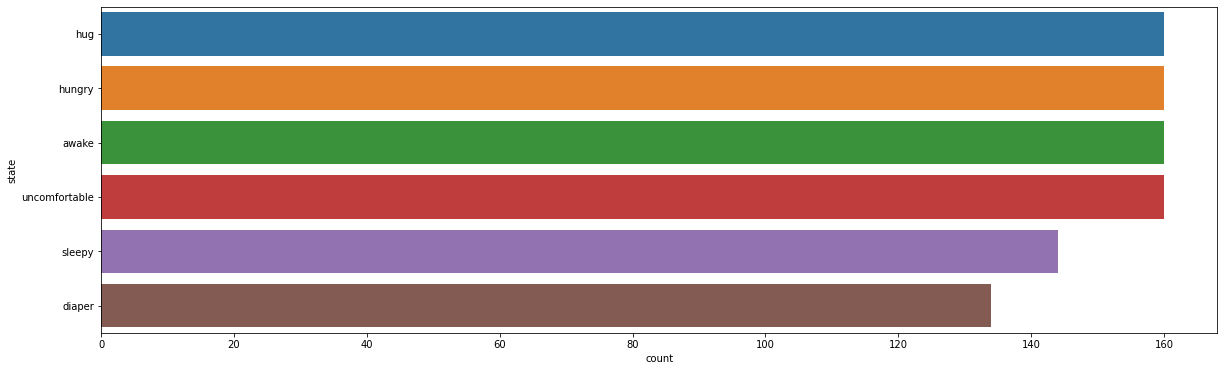

In [27]:
def print_category_info(df: pd.DataFrame, category: str, sub=None):
    print(f"{category} 에 따른 파일의 개수와 비율")
    value_counts = df[category].value_counts()
    keys = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    rates = list(df[category].value_counts(normalize=True).values)

    for i in range(len(keys)):
        print(f"{keys[i]:10s} state exists in {rates[i]*100:05.2f}% of {counts[i]:5d} files.")

    fig, ax = plt.subplots(figsize=(20, 6))
    sns.countplot(y=category, 
                data=df,
                order=keys,
                hue=sub,
                dodge=False)

print_category_info(df, 'state')